# Analysis of the Solar Energy Generation Potential in Brazil

*Trabalho da disciplina **Python para Ciência de Dados** do Prof. Dr. **Rodrigo César Pedrosa Silva** da **Especialização em Inteligência Artificial** do IFMG.*

Autor/aluno: **Bruno da Cunha Ferreira**

In [55]:
#--- Libraries ---#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#--- Debug Mode ---#
%xmode Verbose # habilita debugar de forma completa os erros que vierem aparecer

C:\Users\bruno\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\basic.py:379: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <Verbose # habilita debugar de forma completa os erros que vierem aparecer>
Valid modes: ['Plain', 'Context', 'Verbose', 'Minimal']
  warn('Error changing %s exception modes.\n%s' %


In [57]:
#--- Show Python variable in Markdown ---#
# !pip install jupyterlab  # habilita a impressão do valor de uma variável Python em notação Markdown

## Loading data sources

Loading data from Global Power Plants by having information on the location and production in Mega Watt (MW) of each plant

In [58]:
# Solar Power Plants - https://www.kaggle.com/datasets/pythonafroz/solar-power-plant-dataset
solar_generation = pd.read_csv('./lib/generation/generation.csv')
solar_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [59]:
# Solar Power Plants - https://www.kaggle.com/datasets/pythonafroz/solar-power-plant-dataset
solar_weather = pd.read_csv('./lib/generation/Weather_Sensor.csv')
solar_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [60]:
# Global Power Plant with City, State, Country Cover image - https://www.kaggle.com/datasets/hamid314/global-power-plant-with-city-state-country
power_plants = pd.read_csv('./lib/archive.zip')
power_plants.head()

C:\Users\bruno\AppData\Local\Temp\ipykernel_8940\2010615254.py:2: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  power_plants = pd.read_csv('./lib/archive.zip')


,location - Split 4,location - Split 5,F1,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,...,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,location,location - city,location - state/province,location - country
0,NaN,NaN,0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,...,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,"('', 'Helmand Province', 'Afghanistan')",NaN,Helmand Province,Afghanistan
1,NaN,NaN,1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,...,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,"('Aino Maina', 'Kandahar Province', 'Afghanist...",Aino Maina,Kandahar Province,Afghanistan
2,NaN,NaN,2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,...,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,"('Aino Maina', 'Kandahar Province', 'Afghanist...",Aino Maina,Kandahar Province,Afghanistan
3,NaN,NaN,3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,...,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,"('', 'Kabul Province', 'Afghanistan')",NaN,Kabul Province,Afghanistan
4,NaN,NaN,4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,...,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,"('Surobi', 'Kabul Province', 'Afghanistan')",Surobi,Kabul Province,Afghanistan


Loading data from Brazil Solar Irradiation by having information about its location and solar incidence

In [61]:
# Brazil Solar Irradiation - https://www.kaggle.com/datasets/arvati/brazil-solar-irradiation?select=diffuse_means.csv
# OBS.: Foi necessário converter a separação dos valores do arquivo de ";" para ","
brazil_si = pd.read_csv('./lib/diffuse_means.csv/diffuse_means - diffuse_means.csv')
brazil_si.head()

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,Brazil,-535.49,-337.005,1746,2363,2231,1839,1433,1159,995,1089,1324,1724,2075,2268,2448
1,2,Brazil,-534.49,-337.005,1740,2347,2218,1846,1441,1159,993,1086,1328,1719,2052,2254,2438
2,3,Brazil,-533.49,-337.005,1739,2341,2210,1837,1445,1159,991,1082,1335,1702,2048,2266,2445
3,4,Brazil,-532.49,-337.005,1724,2266,2165,1810,1443,1164,995,1081,1352,1700,2037,2259,2421
4,5,Brazil,-535.49,-336.005,1730,2288,2185,1813,1431,1165,991,1079,1329,1727,2066,2259,2429


Loading data from Brazil Cities by having information about its area and location

In [62]:
# Brazil Cities - https://www.kaggle.com/datasets/crisparada/brazilian-cities?select=BRAZIL_CITIES_REV2022.CSV
brazil_cities = pd.read_csv('./lib/BRAZIL_CITIES_REV2022.CSV.zip')
brazil_cities.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4


### Cleaning up excess data

Of all the solar generation data, we will only need data from id, yield and irradiation. Therefore, we will discard the other information in this database

In [63]:
# Remove columns: 'DATE_TIME', 'SOURCE_KEY', 'DC_POWER' e 'AC_POWER'
# solar_generation = solar_generation.drop('DATE_TIME', axis=1)
solar_generation = solar_generation.drop('SOURCE_KEY', axis=1)
solar_generation = solar_generation.drop('DC_POWER', axis=1)
solar_generation = solar_generation.drop('AC_POWER', axis=1)
# Exibe os 5 primeiros itens
solar_generation.head()

,DATE_TIME,PLANT_ID,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,3177.000000,1.994153e+07


In [64]:
# Remove columns: ['DATE_TIME', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']
solar_weather = solar_weather.drop(['PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], axis=1)
# Exibe os 5 primeiros itens
solar_weather.head()

,DATE_TIME,IRRADIATION
0,2020-05-15 00:00:00,0.0
1,2020-05-15 00:15:00,0.0
2,2020-05-15 00:30:00,0.0
3,2020-05-15 00:45:00,0.0
4,2020-05-15 01:00:00,0.0


Of all the power plants data, we will only need data from country, plant name, capacity, primary fuel and location. Therefore, we will discard the other information in this database

In [65]:
# Show power_plants columns
power_plants.columns

Index(['location - Split 4', 'location - Split 5', 'F1', 'country',
       'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017',
       'location', 'location - city', 'location - state/province',
       'locatio

Of all the Brazil solar irradiation data, we will only need data from annual solar incidence in Brazil and its location. Therefore, we will discard the other information in this database

In [67]:
# Remove columns: 'ID;COUNTRY;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC'
brazil_si.drop(['ID','COUNTRY','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], axis=1, inplace=True)
brazil_si.head()

,LON,LAT,ANNUAL
0,-535.49,-337.005,1746
1,-534.49,-337.005,1740
2,-533.49,-337.005,1739
3,-532.49,-337.005,1724
4,-535.49,-336.005,1730


Of all the Brazil cities data, we will only need data from cities in Brazil with their areas and location. Therefore, we will discard the other information in this database

In [68]:
brazil_cities.columns # Verifica a lista de 81 informações desta base de dados

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       'GVA_TOTAL', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_

In [69]:
# Only not remove this columns: 'CITY', 'STATE', 'LONG', 'LAT', 'AREA'
brazil_cities.drop(['CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'ALT', 'PAY_TV', 'FIXED_PHONES', 
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       'GVA_TOTAL', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_Assets', 'Pu_Assets', 'Cars',
       'Motorcycles', 'Wheeled_tractor', 'UBER', 'MAC', 'WAL-MART',
       'POST_OFFICES'], axis=1, inplace=True)
brazil_cities.head()

,CITY,STATE,LONG,LAT,AREA
0,Abadia De Goiás,GO,-49.4405,-16.7588,147.256
1,Abadia Dos Dourados,MG,-47.3968,-18.4876,881.064
2,Abadiânia,GO,-48.7188,-16.1827,1045.127
3,Abaetetuba,PA,-48.8844,-1.7235,1610.651
4,Abaeté,MG,-45.4462,-19.1558,1817.067


## Fusion of data sources

The solar generation and solar weather are from the same database, so we join base from date time

In [70]:
# Merge Solar Generation with Solar Wheather
merged_solar_data = pd.merge(solar_generation, solar_weather, on='DATE_TIME', how='left')
merged_solar_data.head()

,DATE_TIME,PLANT_ID,DAILY_YIELD,TOTAL_YIELD,IRRADIATION
0,2020-05-15 00:00:00,4136001,9425.000000,2.429011e+06,0.0
1,2020-05-15 00:00:00,4136001,0.000000,1.215279e+09,0.0
2,2020-05-15 00:00:00,4136001,3075.333333,2.247720e+09,0.0
3,2020-05-15 00:00:00,4136001,269.933333,1.704250e+06,0.0
4,2020-05-15 00:00:00,4136001,3177.000000,1.994153e+07,0.0


## Descriptive data analysis

In [71]:
# Extract mean, min and max from merged_solar_data
average_DATE_TIME = pd.to_datetime(merged_solar_data['DATE_TIME']).mean()
min_DATE_TIME = merged_solar_data['DATE_TIME'].min()
max_DATE_TIME = merged_solar_data['DATE_TIME'].max()
average_PLANT_ID = merged_solar_data['PLANT_ID'].mean()
min_PLANT_ID = merged_solar_data['PLANT_ID'].min()
max_PLANT_ID = merged_solar_data['PLANT_ID'].max()
average_DAILY_YIELD = merged_solar_data['DAILY_YIELD'].mean()
min_DAILY_YIELD = merged_solar_data['DAILY_YIELD'].min()
max_DAILY_YIELD = merged_solar_data['DAILY_YIELD'].max()
average_TOTAL_YIELD = merged_solar_data['TOTAL_YIELD'].mean()
min_TOTAL_YIELD = merged_solar_data['TOTAL_YIELD'].min()
max_TOTAL_YIELD = merged_solar_data['TOTAL_YIELD'].max()
average_IRRADIATION = merged_solar_data['IRRADIATION'].mean()
min_IRRADIATION = merged_solar_data['IRRADIATION'].min()
max_IRRADIATION = merged_solar_data['IRRADIATION'].max()

In [72]:
#### Data Analysis from merged_solar_data
print(f'| Analysis  | DATE_TIME                     | PLANT_ID  |  DAILY_YIELD        | TOTAL_YIELD       | IRRADIATION         |')
print(f'|:--------  |:--------                      |:--------  |:--------            |:--------          |:--------            |')
print(f'| Minimum   | {min_DATE_TIME}           | {min_PLANT_ID}   |  {min_DAILY_YIELD}                | {min_TOTAL_YIELD}               | {min_IRRADIATION}                 |')
print(f'| Mean      | {average_DATE_TIME} | {average_PLANT_ID} |  {average_DAILY_YIELD} | {average_TOTAL_YIELD} | {average_IRRADIATION} |')
print(f'| Maximum   | {max_DATE_TIME}           | {max_PLANT_ID}   |  {max_DAILY_YIELD}             | {max_TOTAL_YIELD}      | {max_IRRADIATION}  |')

| Analysis  | DATE_TIME                     | PLANT_ID  |  DAILY_YIELD        | TOTAL_YIELD       | IRRADIATION         |
|:--------  |:--------                      |:--------  |:--------            |:--------          |:--------            |
| Minimum   | 2020-05-15 00:00:00           | 4136001   |  0.0                | 0.0               | 0.0                 |
| Mean      | 2020-06-01 10:44:33.650625024 | 4136001.0 |  3294.8902951797727 | 658944788.4237659 | 0.22920423411699484 |
| Maximum   | 2020-06-17 23:45:00           | 4136001   |  9873.0             | 2247916295.0      | 1.0987660434482758  |


#### Data Analysis from merged_solar_data
| Analysis  | DATE_TIME | PLANT_ID |  DAILY_YIELD | TOTAL_YIELD | IRRADIATION |
|:--------|:--------|:--------|:--------|:--------|:--------|
| Minimum  | 2020-05-15 00:00:00 | 4136001 | 0.0 | 0.0 | 0.0 |
| Mean  | 2020-06-01 10:44:33.650625024 | 4136001.0 |  3294.8902951797727 | 658944788.4237659 | 0.22920423411699484 |
| Maximum  | 2020-06-17 23:45:00 | 4136001 | 9873.0 | 2247916295.0 | 1.0987660434482758 |

### Data distribuition from merged_solar_data

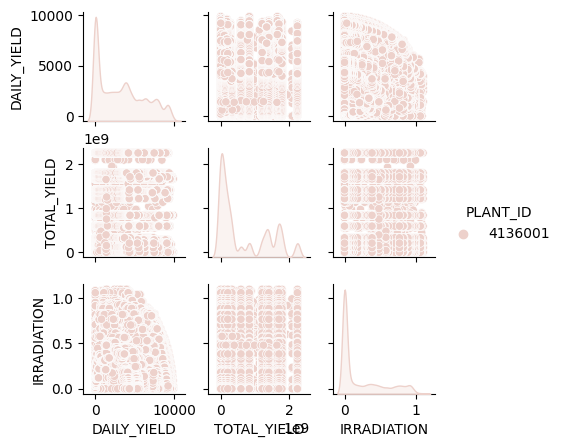

In [73]:
sns.pairplot(merged_solar_data, hue = 'PLANT_ID', height=1.5)

From this analysis it was possible to conclude that readings of null values in energy generation or irradiation are generating noise in the data and can compromise the training of the machine learning models that we will do later on. Therefore, this data will be removed.

### Handling data

In [74]:
# Removing data void
merged_sd = merged_solar_data.loc[(merged_solar_data['DAILY_YIELD'] > 0) & (merged_solar_data.IRRADIATION > 0)]
merged_sd.head()

,DATE_TIME,PLANT_ID,DAILY_YIELD,TOTAL_YIELD,IRRADIATION
528,2020-05-15 06:00:00,4136001,0.800000,2.429012e+06,0.012962
529,2020-05-15 06:00:00,4136001,0.733333,1.215279e+09,0.012962
530,2020-05-15 06:00:00,4136001,1.866667,2.247720e+09,0.012962
531,2020-05-15 06:00:00,4136001,1.000000,1.704251e+06,0.012962
532,2020-05-15 06:00:00,4136001,0.733333,1.994153e+07,0.012962


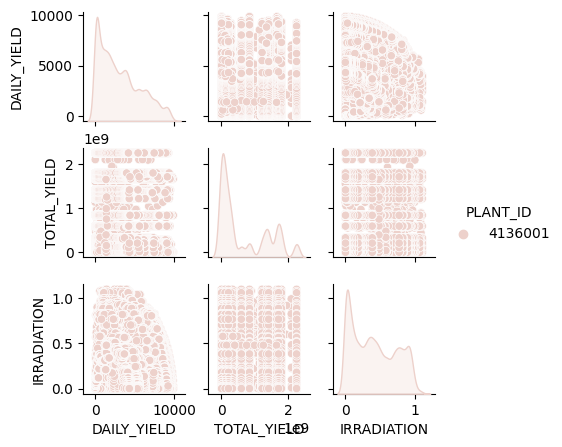

In [75]:
sns.pairplot(merged_sd, hue = 'PLANT_ID', height=1.5)

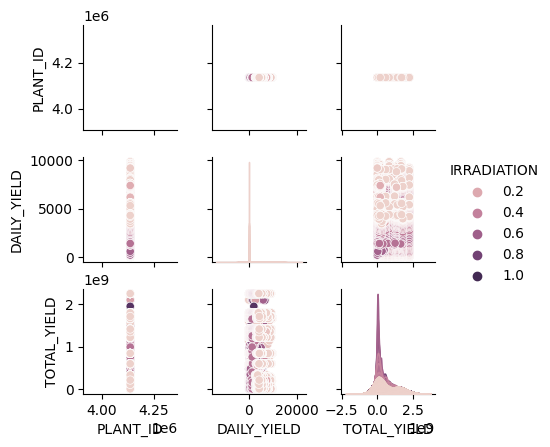

In [76]:
sns.pairplot(merged_sd, hue = 'IRRADIATION', height=1.5)

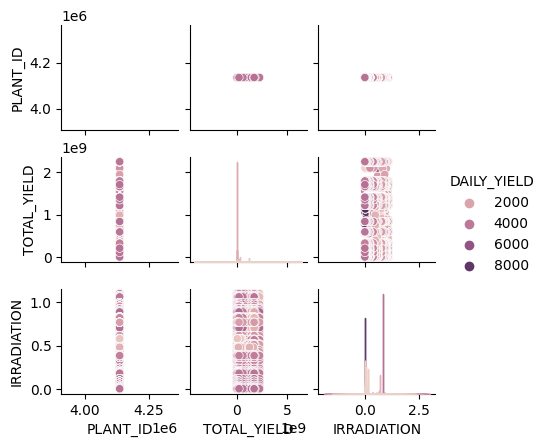

In [77]:
sns.pairplot(merged_sd, hue = 'DAILY_YIELD', height=1.5)

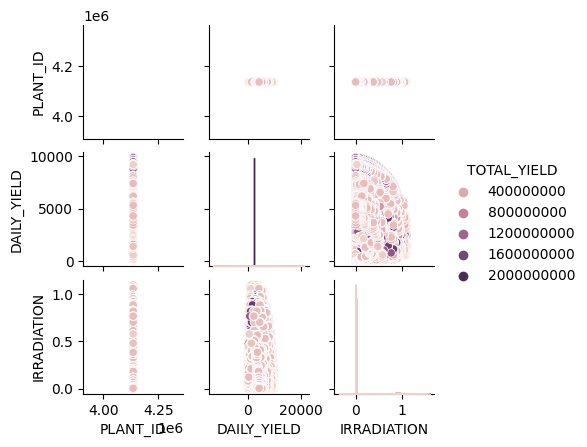

In [82]:
sns.pairplot(merged_sd, hue = 'TOTAL_YIELD', height=1.5)

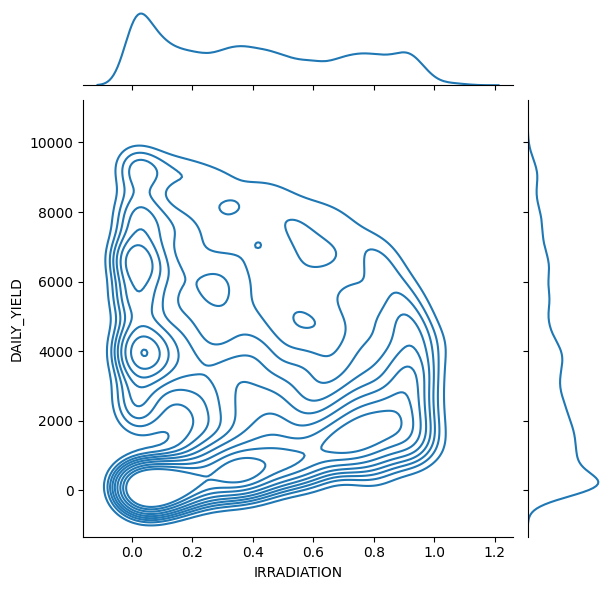

In [84]:
sns.jointplot(merged_sd,x='IRRADIATION',y='DAILY_YIELD',kind='kde')

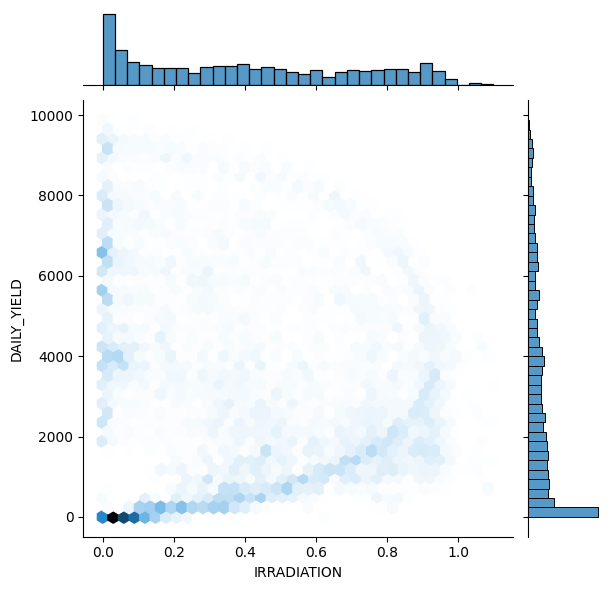

In [85]:
sns.jointplot(merged_sd,x='IRRADIATION',y='DAILY_YIELD',kind='hex')

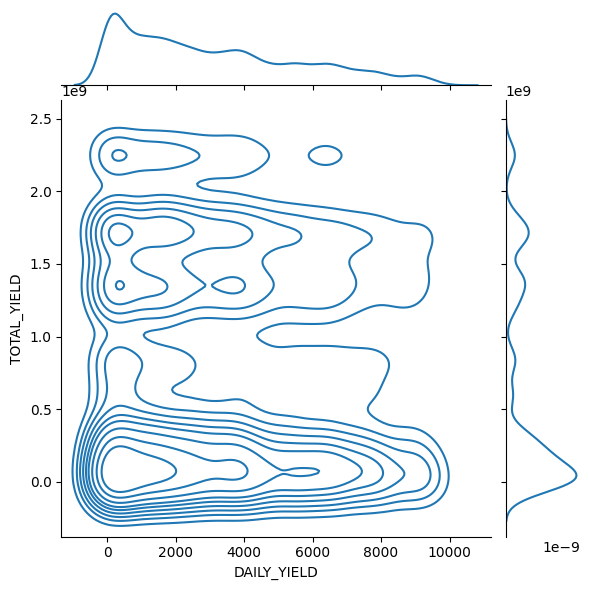

In [92]:
sns.jointplot(merged_sd,x='DAILY_YIELD',y='TOTAL_YIELD',kind='kde')

C:\Users\bruno\AppData\Local\Temp\ipykernel_8940\1361963746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_sd.IRRADIATION)
C:\Users\bruno\AppData\Local\Temp\ipykernel_8940\1361963746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_sd.TOTAL_YIELD)


<Axes: xlabel='TOTAL_YIELD', ylabel='Density'>

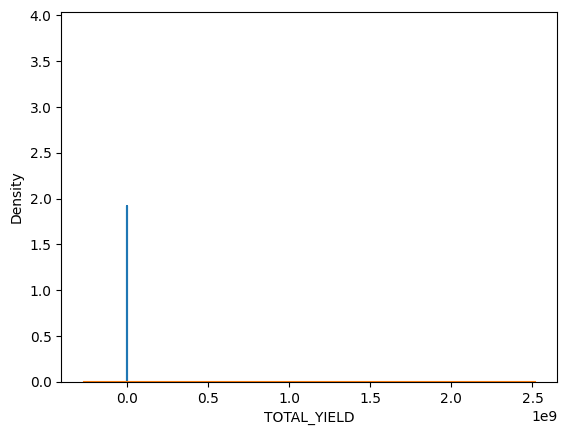

In [89]:
sns.distplot(merged_sd.IRRADIATION)
sns.distplot(merged_sd.TOTAL_YIELD)